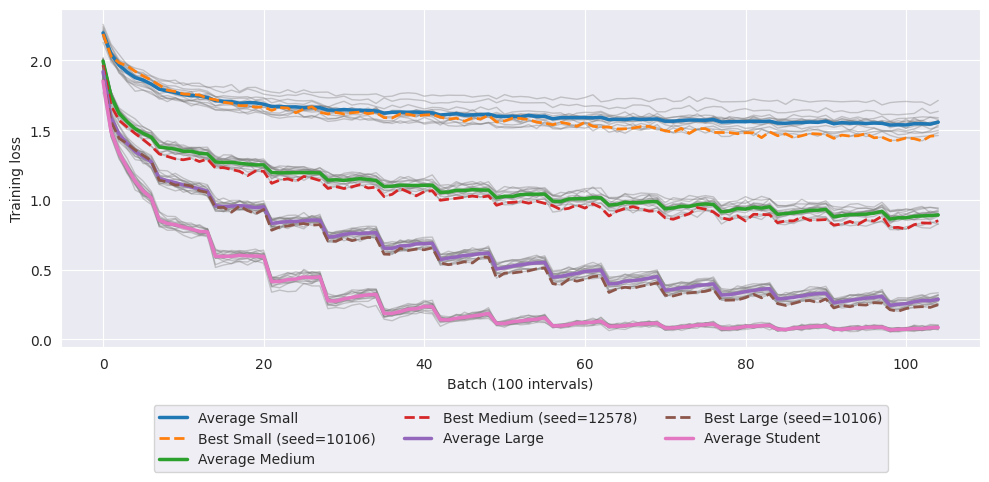

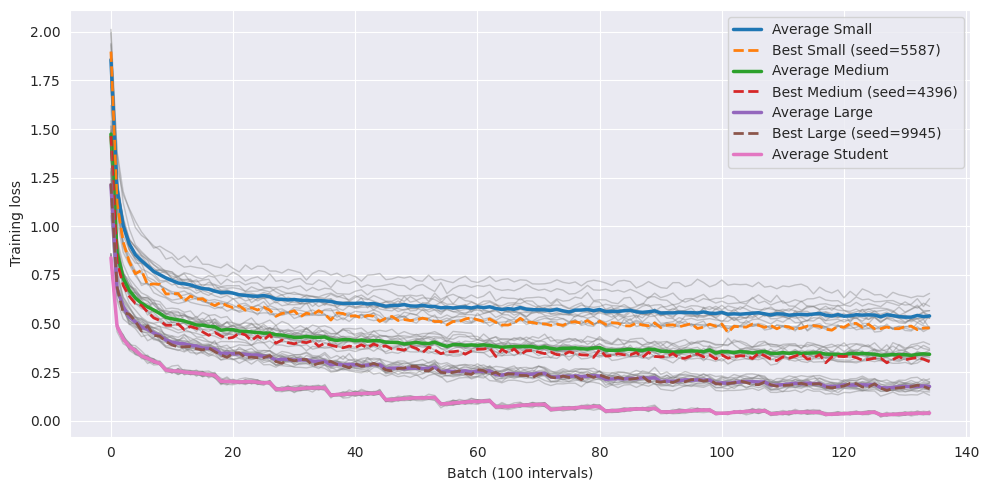

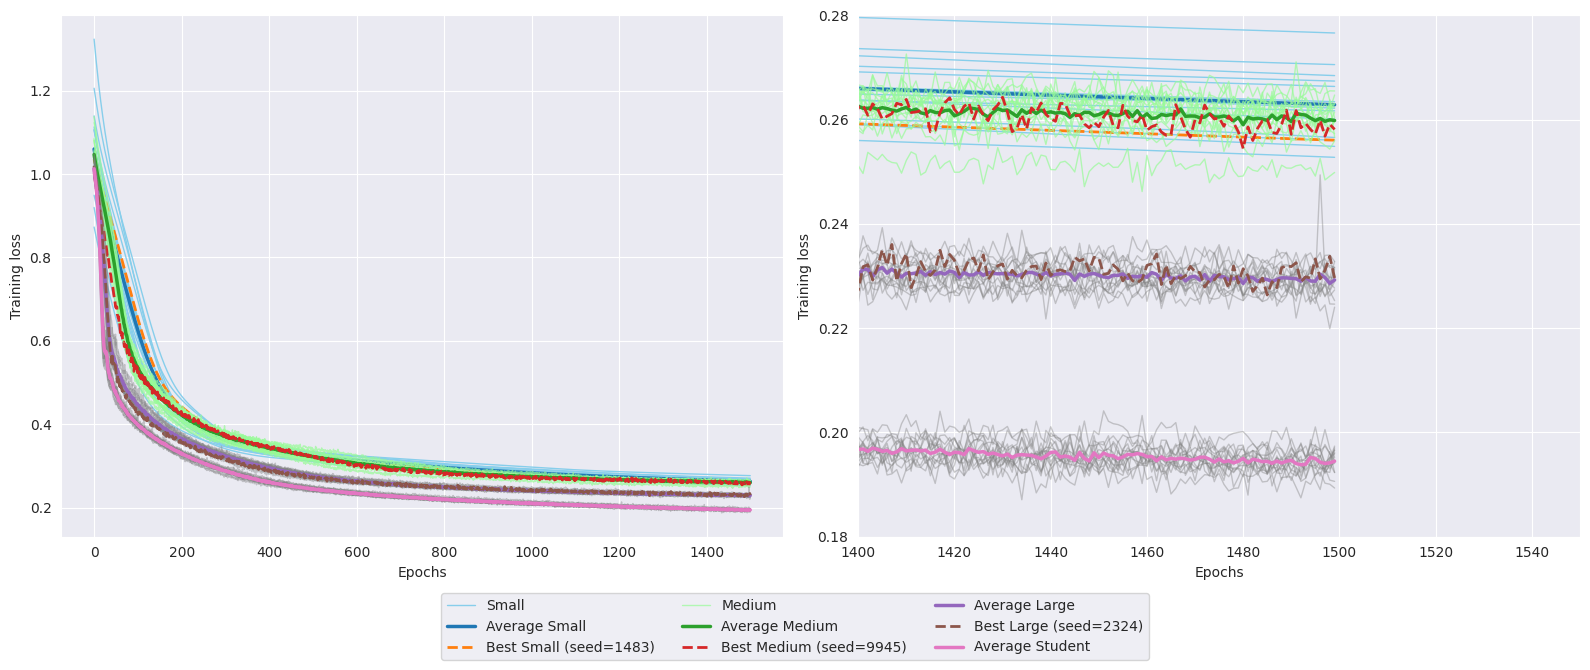

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

size_map = {
    "small": "Small",
    "medium": "Medium",
    "large": "Large",
    "student": "Student"
}

seeds = np.loadtxt("../scripts/configs/seeds.txt", dtype=int).tolist()

# Načti a ulož data pro všechny modely CIFAR-10
all_losses_cifar = []
best_losses_cifar = []
avg_losses_cifar = []
best_seeds_cifar = []

output_paths_cifar = [
    "../outputs/teacher_small_cifar",
    "../outputs/teacher_medium_cifar",
    "../outputs/teacher_large_cifar",
    "../outputs/student_cifar"
]

for output_path in output_paths_cifar:
    losses_for_model = []
    accuracies_for_model = []

    for seed in seeds:
        try:
            loss_path = f"{output_path}/model_seed_{seed}/training_losses.txt"
            acc_path = f"{output_path}/model_seed_{seed}/accuracy.txt"
            losses = np.loadtxt(loss_path)
            acc = np.loadtxt(acc_path)
            losses_for_model.append(losses)
            accuracies_for_model.append(acc)
        except Exception as e:
            print(f"Skipping seed {seed} in {output_path}: {e}")
    
    if losses_for_model:
        # Přidáme všechny ztráty pro daný model
        all_losses_cifar.append(np.array(losses_for_model))

        # Průměrná ztráta
        avg_loss = np.mean(losses_for_model, axis=0)
        avg_losses_cifar.append(avg_loss)
        
        # Nejlepší model podle accuracy
        best_idx = np.argmax(accuracies_for_model)  # Nejlepší model podle accuracy
        best_loss = losses_for_model[best_idx]
        best_seeds_cifar.append(seeds[best_idx])
        best_losses_cifar.append(best_loss)

# Vytvoř graf pro tréninkové ztráty CIFAR-10
plt.figure(figsize=(10, 5))

for idx, losses in enumerate(all_losses_cifar):
    for loss in losses:
        plt.plot(loss, color='gray', alpha=0.4, linewidth=1)
    
    plt.plot(avg_losses_cifar[idx], label=f"Average {size_map[list(size_map.keys())[idx]]}", linewidth=2.5)
    if size_map[list(size_map.keys())[idx]] != "Student":
        plt.plot(best_losses_cifar[idx], label=f"Best {size_map[list(size_map.keys())[idx]]} (seed={best_seeds_cifar[idx]})", linestyle="--", linewidth=2)

plt.xlabel("Batch (100 intervals)")
plt.ylabel("Training loss")
#plt.title("CIFAR-10 – Training Loss of Small, Medium, Large and Student Models")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.savefig("../graphs/teacher_cifar_training_losses.pdf", bbox_inches='tight')
plt.show()

# Načti a ulož data pro všechny modely Fashion MNIST
all_losses_fashion_mnist = []
best_losses_fashion_mnist = []
avg_losses_fashion_mnist = []
best_seeds_fashion_mnist = []

output_paths_fashion_mnist = [
    "../outputs/teacher_small_fashion_mnist",
    "../outputs/teacher_medium_fashion_mnist",
    "../outputs/teacher_large_fashion_mnist",
    "../outputs/student_fashion_mnist"
]

for output_path in output_paths_fashion_mnist:
    losses_for_model = []
    accuracies_for_model = []

    for seed in seeds:
        try:
            loss_path = f"{output_path}/model_seed_{seed}/training_losses.txt"
            acc_path = f"{output_path}/model_seed_{seed}/accuracy.txt"
            losses = np.loadtxt(loss_path)
            acc = np.loadtxt(acc_path)
            losses_for_model.append(losses)
            accuracies_for_model.append(acc)
        except Exception as e:
            print(f"Skipping seed {seed} in {output_path}: {e}")
    
    if losses_for_model:
        all_losses_fashion_mnist.append(np.array(losses_for_model))
        avg_loss = np.mean(losses_for_model, axis=0)
        avg_losses_fashion_mnist.append(avg_loss)
        
        best_idx = np.argmax(accuracies_for_model)  # Nejlepší model podle accuracy
        best_loss = losses_for_model[best_idx]
        best_seeds_fashion_mnist.append(seeds[best_idx])
        best_losses_fashion_mnist.append(best_loss)

# Vytvoř graf pro tréninkové ztráty Fashion MNIST
plt.figure(figsize=(10, 5))

for idx, losses in enumerate(all_losses_fashion_mnist):
    for loss in losses:
        plt.plot(loss, color='gray', alpha=0.4, linewidth=1)
    
    plt.plot(avg_losses_fashion_mnist[idx], label=f"Average {size_map[list(size_map.keys())[idx]]}", linewidth=2.5)
    if size_map[list(size_map.keys())[idx]] != "Student":
        plt.plot(best_losses_fashion_mnist[idx], label=f"Best {size_map[list(size_map.keys())[idx]]} (seed={best_seeds_fashion_mnist[idx]})", linestyle="--", linewidth=2)

plt.xlabel("Batch (100 intervals)")
plt.ylabel("Training loss")
#plt.title("Fashion MNIST – Training Loss of Small, Medium, Large and Student Models")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../graphs/teacher_fashion_training_losses.pdf", bbox_inches='tight')
plt.show()

# Načti a ulož data pro všechny modely California Housing
all_losses_california_housing = []
best_losses_california_housing = []
avg_losses_california_housing = []
best_seeds_california_housing = []

output_paths_california_housing = [
    "../outputs/teacher_small_california_housing",
    "../outputs/teacher_medium_california_housing",
    "../outputs/teacher_large_california_housing",
    "../outputs/student_california_housing"
]

for output_path in output_paths_california_housing:
    losses_for_model = []
    accuracies_for_model = []

    for seed in seeds:
        try:
            loss_path = f"{output_path}/model_seed_{seed}/training_losses.txt"
            acc_path = f"{output_path}/model_seed_{seed}/accuracy.txt"
            losses = np.loadtxt(loss_path)
            acc = np.loadtxt(acc_path)
            losses_for_model.append(losses)
            accuracies_for_model.append(acc)
        except Exception as e:
            print(f"Skipping seed {seed} in {output_path}: {e}")
    
    if losses_for_model:
        all_losses_california_housing.append(np.array(losses_for_model))
        avg_loss = np.mean(losses_for_model, axis=0)
        avg_losses_california_housing.append(avg_loss)
        
        best_idx = np.argmin(accuracies_for_model)  # Nejlepší model podle accuracy
        best_loss = losses_for_model[best_idx]
        best_seeds_california_housing.append(seeds[best_idx])
        best_losses_california_housing.append(best_loss)

# Vytvoř graf pro tréninkové ztráty California Housing
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for idx, losses in enumerate(all_losses_california_housing):
    for loss in losses:
        if size_map[list(size_map.keys())[idx]] == "Small":
            axes[0].plot(loss, color='#87CEEB', label=f"Small", linewidth=1)
        elif size_map[list(size_map.keys())[idx]] == "Medium":
            axes[0].plot(loss, color='#98FB98', label=f"Medium", alpha=0.7, linewidth=1)
        else:
            axes[0].plot(loss, color='gray', alpha=0.4, linewidth=1)
    
    axes[0].plot(avg_losses_california_housing[idx], label=f"Average {size_map[list(size_map.keys())[idx]]}", linewidth=2.5)
    if size_map[list(size_map.keys())[idx]] != "Student":
        axes[0].plot(best_losses_california_housing[idx], label=f"Best {size_map[list(size_map.keys())[idx]]} (seed={best_seeds_california_housing[idx]})", linestyle="--", linewidth=2)

axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training loss")
# axes[0].set_title("California Housing – Training Loss of Small, Medium, Large and Student Models")
axes[0].grid(True)

axes[1].set_xlim(1400, 1550)
axes[1].set_ylim(0.18, 0.28)
for idx, losses in enumerate(all_losses_california_housing):
    for loss in losses:
        if size_map[list(size_map.keys())[idx]] == "Small":
            axes[1].plot(loss, color='#87CEEB', label=f"Small", linewidth=1)
        elif size_map[list(size_map.keys())[idx]] == "Medium":
            axes[1].plot(loss, color='#98FB98', label=f"Medium", alpha=0.7, linewidth=1)
        else:
            axes[1].plot(loss, color='gray', alpha=0.4, linewidth=1)
    
    axes[1].plot(avg_losses_california_housing[idx], label=f"Average {size_map[list(size_map.keys())[idx]]}", linewidth=2.5)
    if size_map[list(size_map.keys())[idx]] != "Student":
        axes[1].plot(best_losses_california_housing[idx], label=f"Best {size_map[list(size_map.keys())[idx]]} (seed={best_seeds_california_housing[idx]})", linestyle="--", linewidth=2)

axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Training loss")
# axes[1].set_title("California Housing – Training Loss (Zoomed)")
axes[1].grid(True)

# Společná legenda
handles, labels = axes[0].get_legend_handles_labels()
unique = {}
for h, l in zip(handles, labels):
    if l not in unique:
        unique[l] = h

fig.legend(unique.values(), unique.keys(), loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=3)

plt.tight_layout() 
plt.savefig("../graphs/teacher_california_training_losses_combined.pdf", bbox_inches='tight')
plt.show()


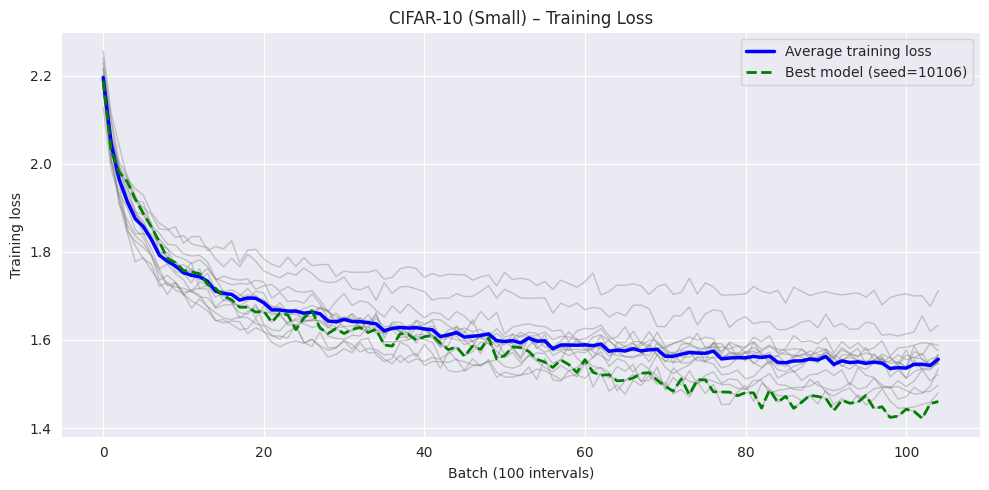

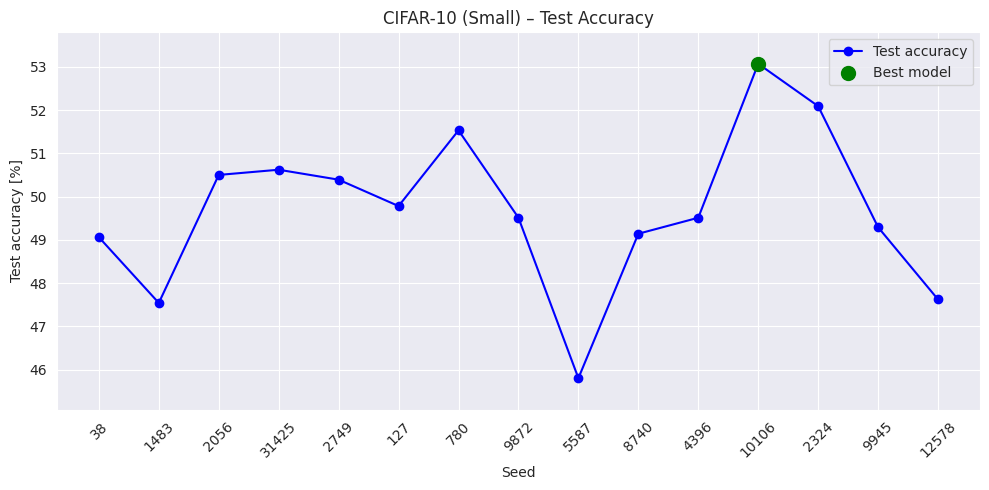

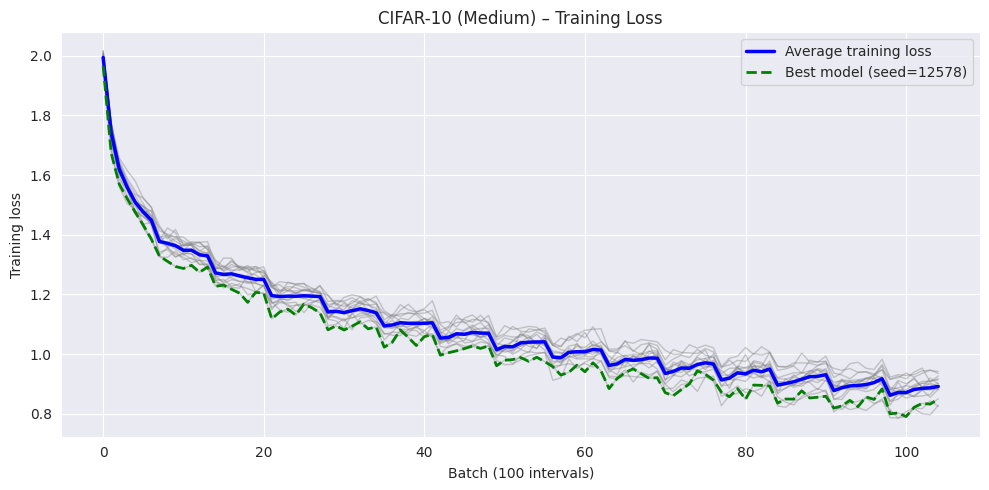

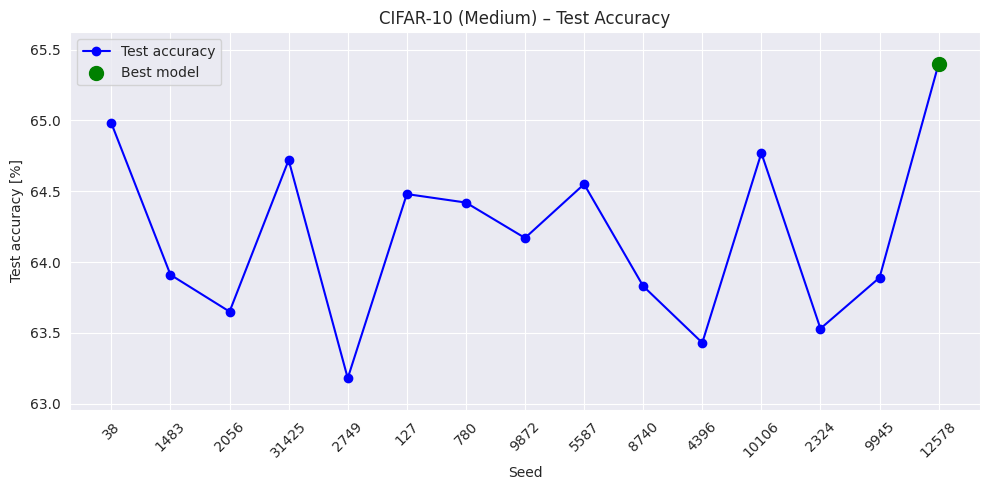

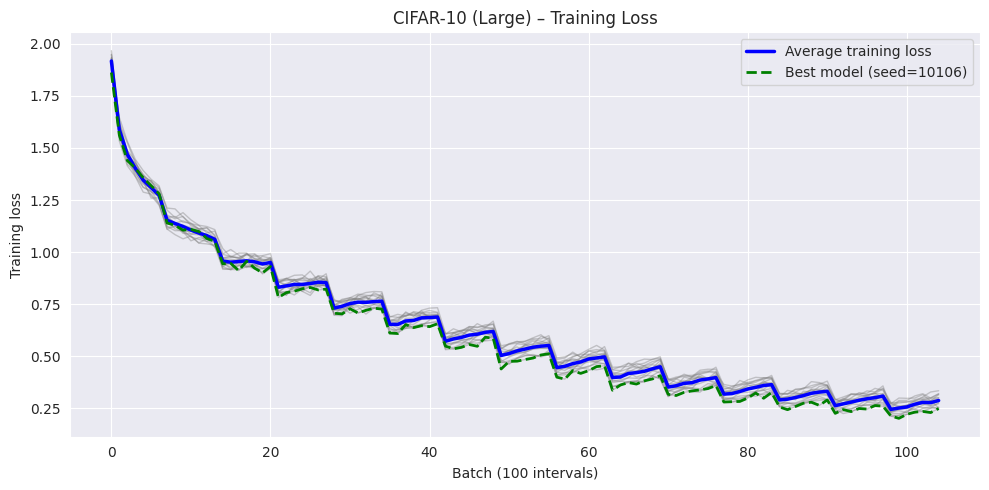

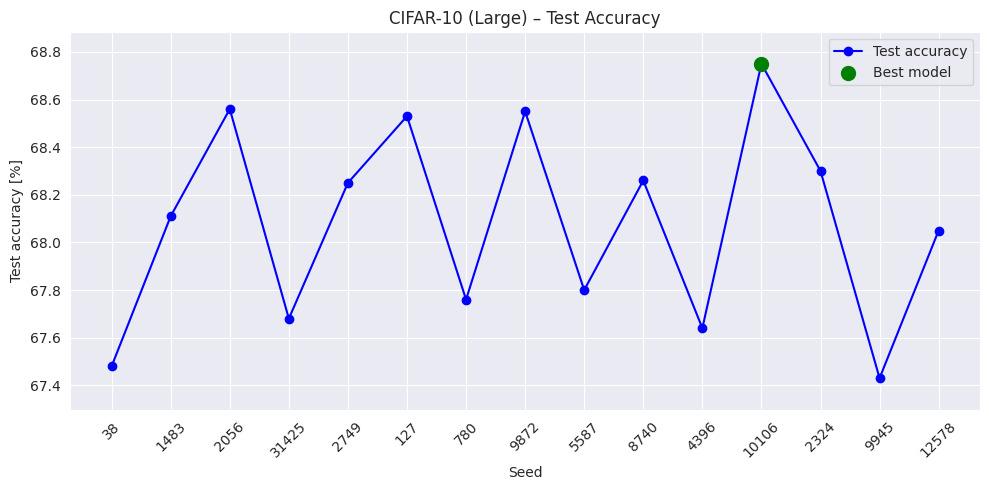

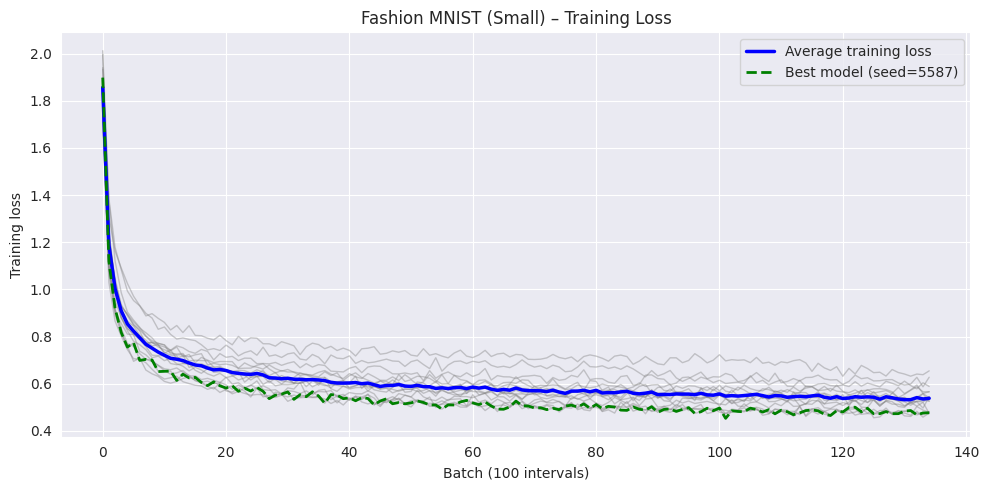

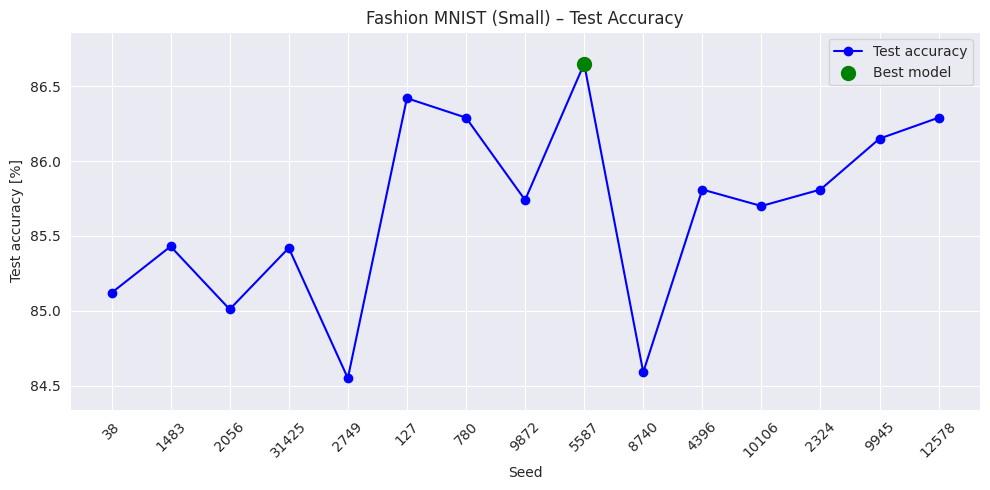

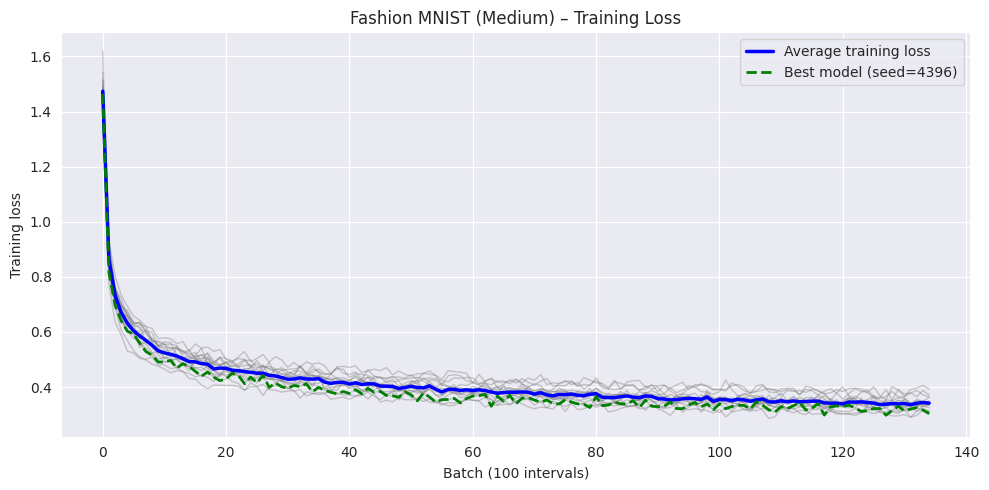

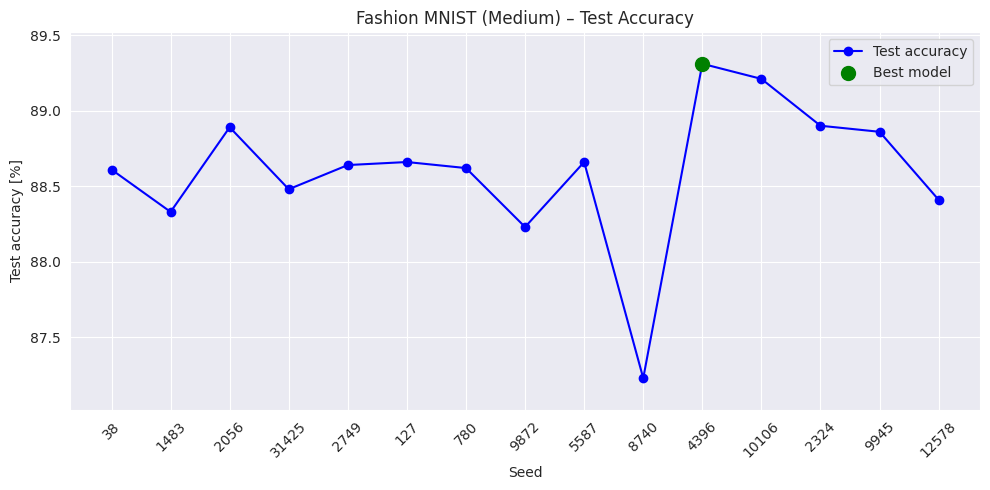

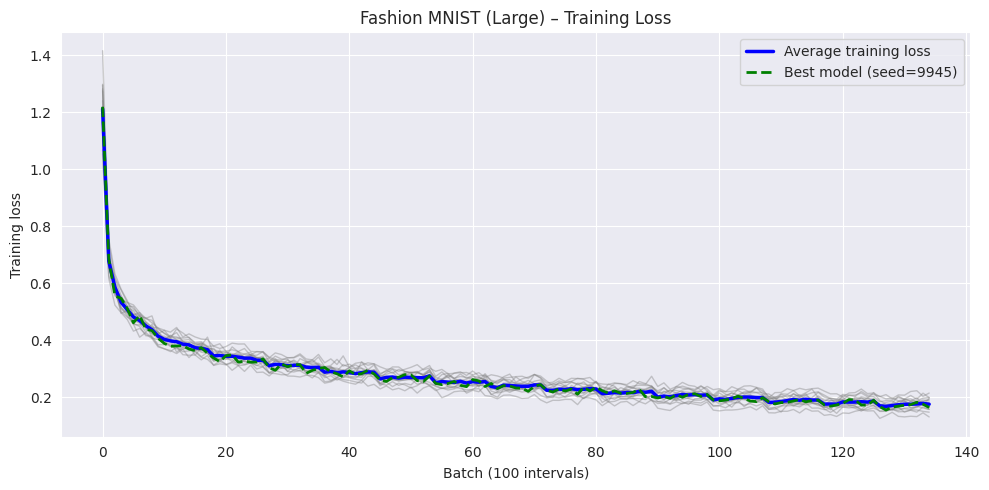

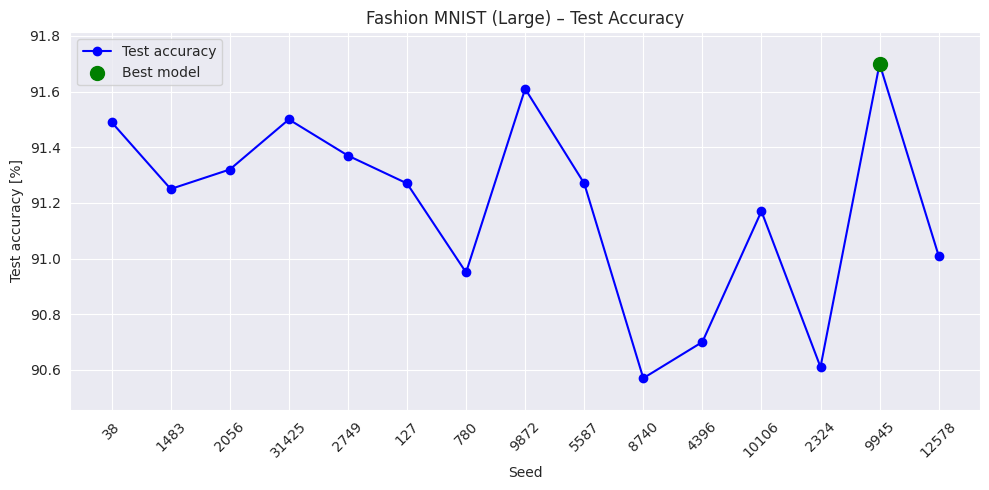

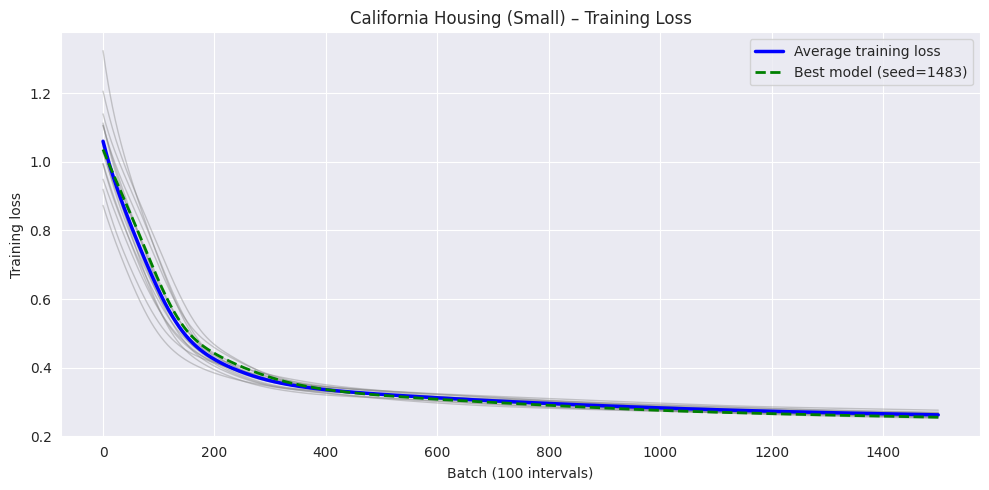

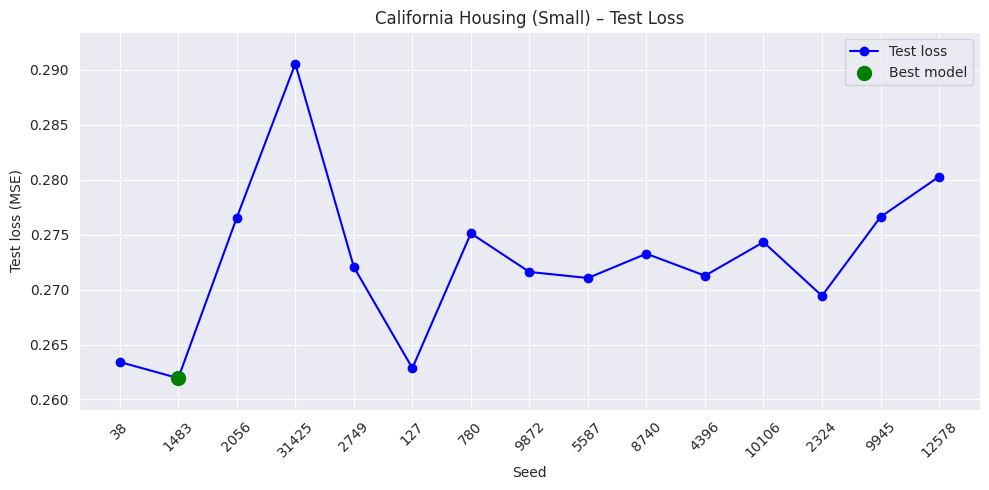

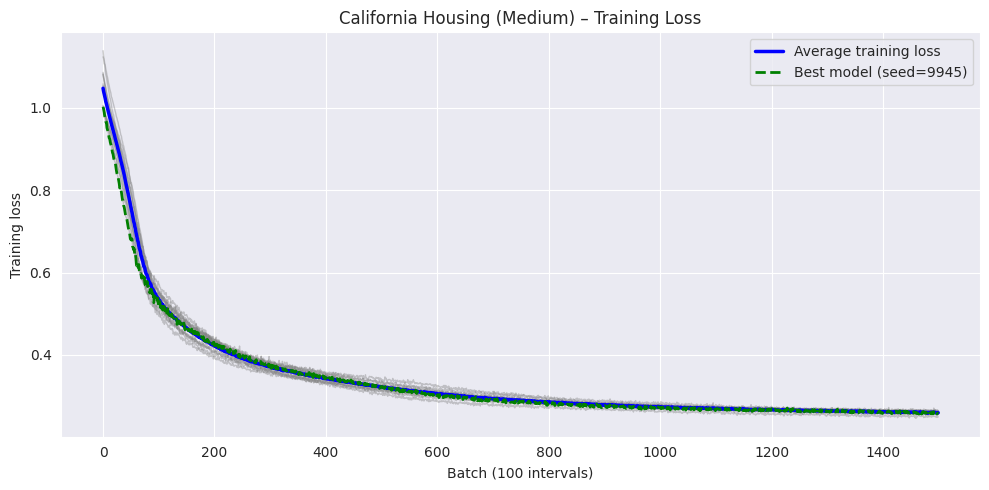

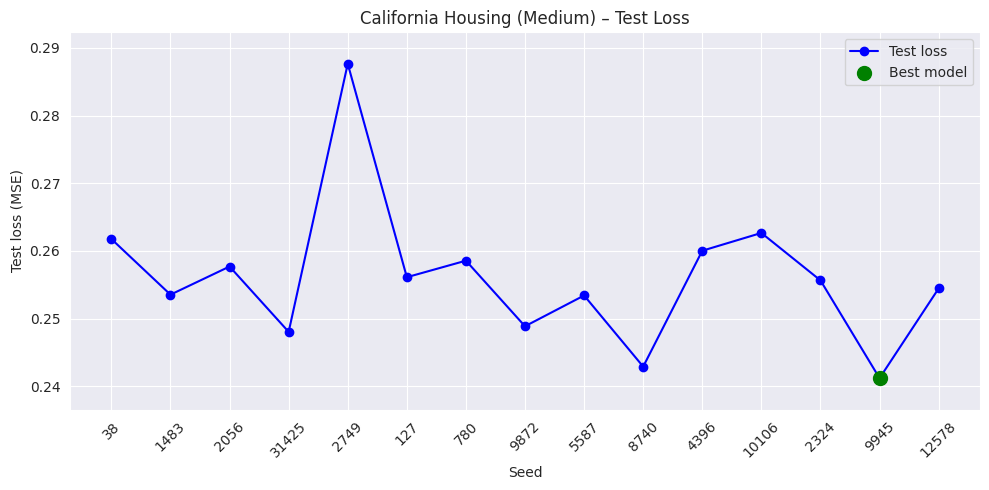

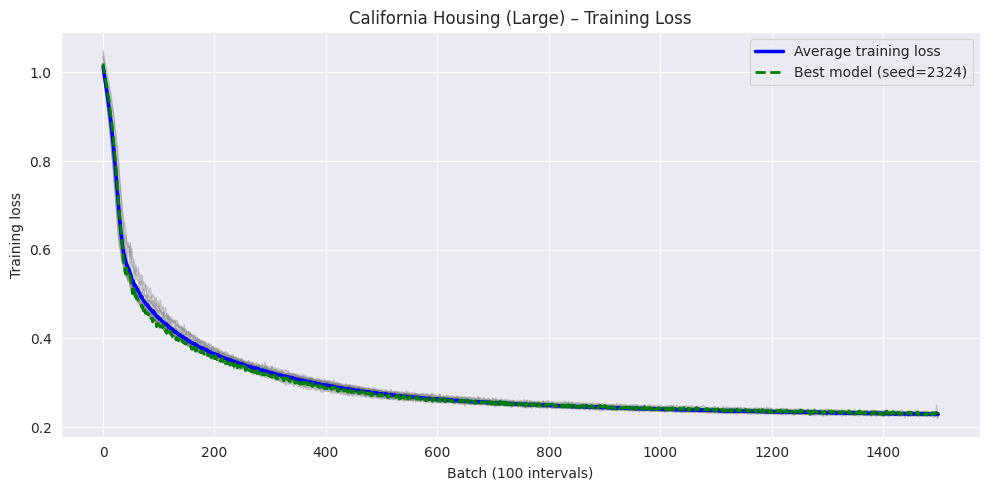

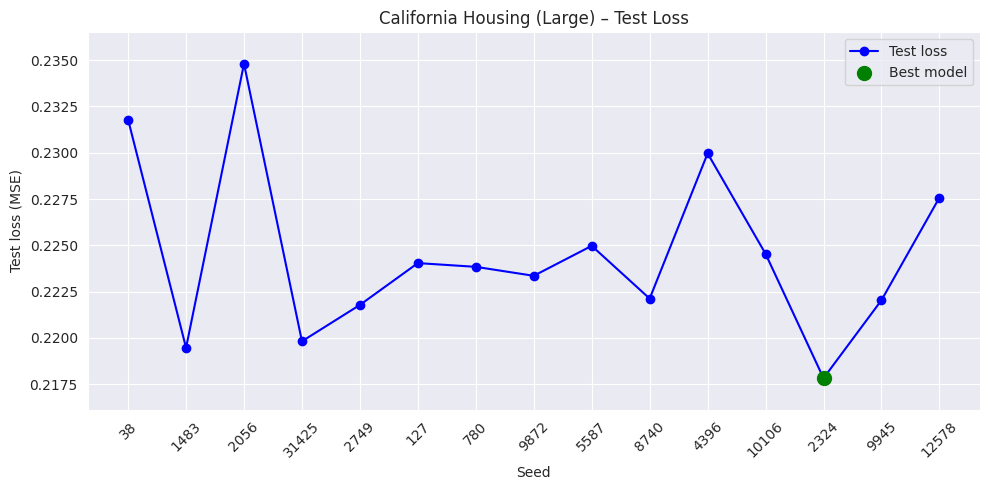

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Mapa pro jména datasetů a modelů
dataset_map = {
    "cifar": "CIFAR-10",
    "fashion_mnist": "Fashion MNIST",
    "california_housing": "California Housing"
}
size_map = {
    "small": "Small",
    "medium": "Medium",
    "large": "Large"
}

# Všechny kombinace modelů
output_paths = [
    "../outputs/teacher_small_cifar",
    "../outputs/teacher_medium_cifar",
    "../outputs/teacher_large_cifar",
    "../outputs/teacher_small_fashion_mnist",
    "../outputs/teacher_medium_fashion_mnist",
    "../outputs/teacher_large_fashion_mnist",
    "../outputs/teacher_small_california_housing",
    "../outputs/teacher_medium_california_housing",
    "../outputs/teacher_large_california_housing"
]

seeds = np.loadtxt("../scripts/configs/seeds.txt", dtype=int).tolist()

for output_path in output_paths:
    all_losses = []
    accuracies = []

    for seed in seeds:
        try:
            loss_path = f"{output_path}/model_seed_{seed}/training_losses.txt"
            acc_path = f"{output_path}/model_seed_{seed}/accuracy.txt"

            losses = np.loadtxt(loss_path)
            acc = np.loadtxt(acc_path)

            all_losses.append(losses)
            accuracies.append(acc)

        except Exception as e:
            print(f"Skipping seed {seed} in {output_path}: {e}")

    if not all_losses:
        print(f"Skipping {output_path} – no valid data.")
        continue

    # Zjisti dataset a velikost
    folder = os.path.basename(output_path)
    for key in dataset_map:
        if key in folder:
            dataset_key = key
            dataset = dataset_map[key]
            break
    for key in size_map:
        if key in folder:
            size = size_map[key]
            break

    is_regression = dataset_key == "california_housing"
    title_prefix = f"{dataset} ({size})"

    # Najdi nejlepší model
    best_idx = np.argmin(accuracies) if is_regression else np.argmax(accuracies)
    best_seed = seeds[best_idx]
    best_loss = all_losses[best_idx]

    # Spočítej průměrný loss
    loss_array = np.array(all_losses)
    avg_loss = np.mean(loss_array, axis=0)

    # === TRAINING LOSS ===
    plt.figure(figsize=(10, 5))
    for loss in all_losses:
        plt.plot(loss, color='gray', alpha=0.4, linewidth=1)

    plt.plot(avg_loss, label="Average training loss", color="blue", linewidth=2.5)
    plt.plot(best_loss, label=f"Best model (seed={best_seed})", color="green", linestyle="--", linewidth=2)

    plt.xlabel("Batch (100 intervals)")
    plt.ylabel("Training loss")
    plt.title(f"{title_prefix} – Training Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # === TEST ACCURACY / LOSS ===
    x = list(range(len(seeds)))
    best_acc = accuracies[best_idx]

    plt.figure(figsize=(10, 5))
    plt.plot(x, accuracies, marker='o', linestyle='-', color='blue',
             label='Test loss' if is_regression else 'Test accuracy')
    plt.scatter(best_idx, best_acc, color='green', s=100, zorder=5, label='Best model')

    plt.xticks(ticks=x, labels=seeds, rotation=45)
    plt.xlabel("Seed")
    plt.ylabel("Test loss (MSE)" if is_regression else "Test accuracy [%]")
    plt.title(f"{title_prefix} – Test Loss" if is_regression else f"{title_prefix} – Test Accuracy")
    plt.grid(True)

    acc_min = min(accuracies)
    acc_max = max(accuracies)
    padding = (acc_max - acc_min) * 0.1
    plt.ylim(acc_min - padding, acc_max + padding)

    plt.legend()
    plt.tight_layout()
    plt.show()

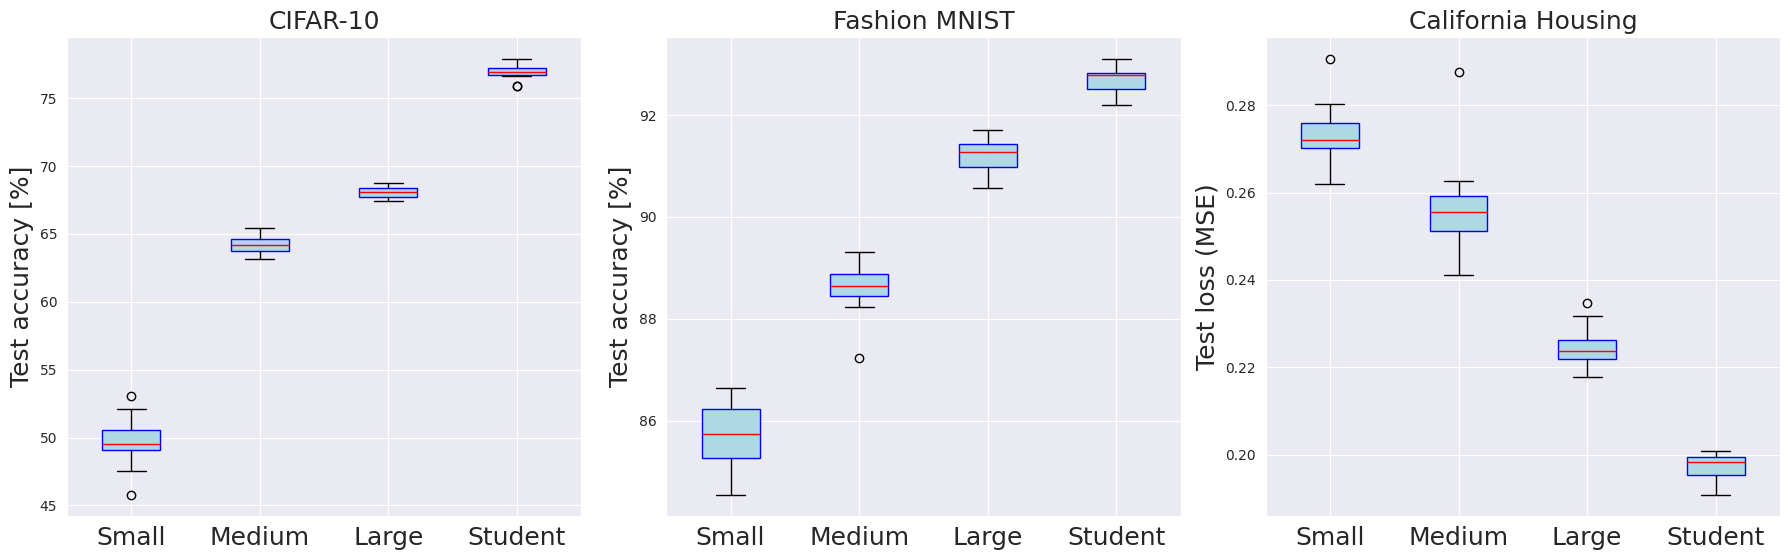

In [3]:
# === BOXPLOTY – 3 vedle sebe ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, dataset_key in enumerate(["cifar", "fashion_mnist", "california_housing"]):
    dataset_name = dataset_map[dataset_key]
    is_regression = dataset_key == "california_housing"

    labels = []
    data = []

    for size in ["Small", "Medium", "Large", "Student"]:
        accs = []
        if size == "Student":
            output_path = f"../outputs/{size.lower()}_{dataset_key}"
        else:
            output_path = f"../outputs/teacher_{size.lower()}_{dataset_key}"
        for seed in seeds:
            acc_path = f"{output_path}/model_seed_{seed}/accuracy.txt"
            acc = np.loadtxt(acc_path)
            accs.append(acc)

        if accs:
            labels.append(size)
            data.append(accs)

    ax = axes[i]
    box = ax.boxplot(data, tick_labels=labels, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red'))

        # Zvětšení textu
    ax.set_title(dataset_name, fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.set_ylabel("Test loss (MSE)" if is_regression else "Test accuracy [%]", fontsize=18)
    ax.grid(True, axis='y')

#plt.suptitle("Performance variability across seeds by dataset and model size", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("../graphs/teacher_variability_boxplots.pdf", bbox_inches='tight')
plt.show()
